## 1 : Loading Data


We'll follow the Data Quality Framework Table for each table in order

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
transactions = pd.read_excel('data.xlsx',sheet_name = 1,header = 1)
new_customers = pd.read_excel('data.xlsx',sheet_name = 2,header = 1)
demographs = pd.read_excel('data.xlsx',sheet_name = 3,header = 1)
addresses = pd.read_excel('data.xlsx',sheet_name = 4,header = 1)

### A) Transactions

In [2]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


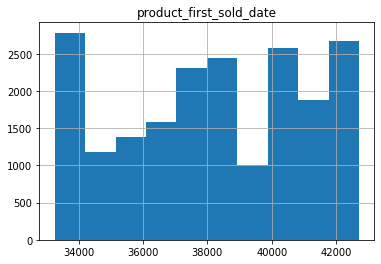

In [3]:
transactions.hist('product_first_sold_date')
plt.show()

First violation found regarding data accuracy is that the column 'product_first_sold_date' appears to carry float values which usally represent other quantities & has nothing to do with dates. I suggest we reconsider this column name.

46.15384615384615

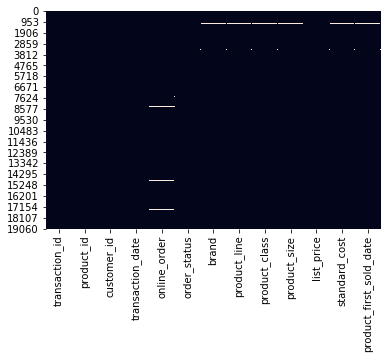

In [4]:
import seaborn as sns
sns.heatmap(transactions.isnull(),cbar = False)
6/transactions.shape[1] * 100

After visualizing null values, it appears that there are logical patterns of missing values. The column 'online_order' has 3 missing values & transaction number 953 has 6 missing attributes which sum up to 46% of the entire transaction data for a single transaction. I suggest (if contacting custmoers isn't an option) to drop transaction number 953 & to investigate some strategies to impute the three missing values of 'online_order' column.

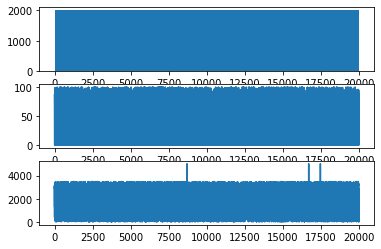

In [5]:
fig,ax = plt.subplots(3)
ax[0].hist(transactions.transaction_id)
ax[1].plot(transactions.product_id)
ax[2].plot(transactions.customer_id)
plt.show()

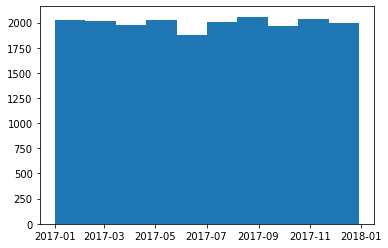

First transaction :  2017-01-01 00:00:00
Last transaction :  2017-12-30 00:00:00


In [6]:
plt.hist(transactions.transaction_date)
plt.show()
print("First transaction : ",transactions.transaction_date.min())
print("Last transaction : ",transactions.transaction_date.max())

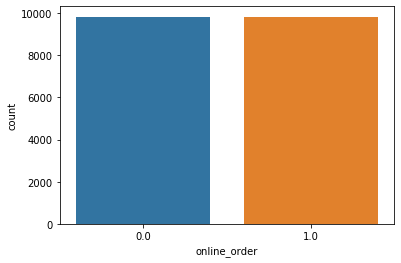

In [7]:
sns.countplot('online_order',data = transactions)
plt.show()

In [8]:
transactions.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

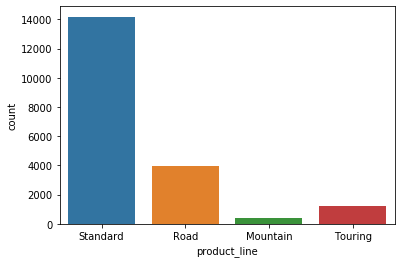

In [9]:
sns.countplot('product_line',data = transactions)
plt.show()

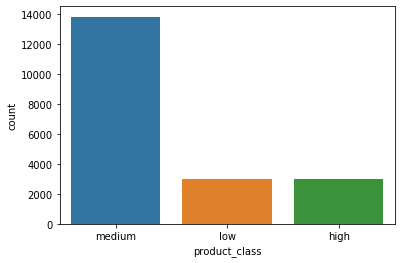

In [10]:
sns.countplot('product_class',data = transactions)
plt.show()

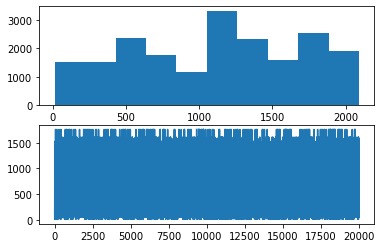

In [11]:
fig,ax = plt.subplots(2)
ax[0].hist(transactions.list_price)
ax[1].plot(transactions.standard_cost)
plt.show()

So I went quickly thorugh all the attributes (except for the last one) with plotting, every variable seems to carry appropriate & relevant values. All what we have to do next for this table is to check for duplicated rows.

In [42]:
print("Percentage of unique identifiers : ",len(transactions.transaction_id.unique())/transactions.shape[0]*100,"%")

Percentage of unique identifiers :  100.0 %


In [12]:
print("Percentage of duplicated rows  : ",len(transactions[transactions.duplicated()])/transactions.shape[0]*100,"%")

Percentage of duplicated rows  :  0.0 %


### B) New Customers


In [13]:
new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


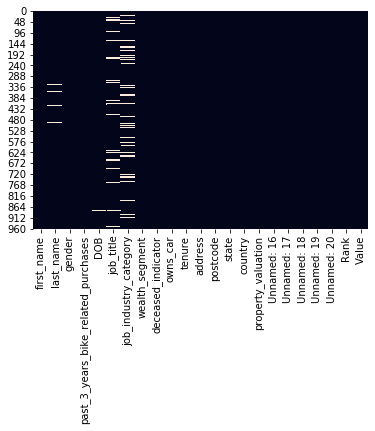

Customers of missing last name :  12 58 87 155 202 326 330 357 419 442 455 474 477 484 487 494 502 531 586 616 755 767 779 786 813 839 849 888 952
Customers of missing DOB :  59 226 324 358 360 374 434 439 574 598 664 751 775 835 883 904 984
Percentage of missing job titles :  10.6 %
Percentage of missing job industry categories :  16.5 %
Percentage of missing job titles & job industry categories :  2.1999999999999997 %


In [14]:
sns.heatmap(new_customers.isnull(),cbar = False)
plt.show()
print("Customers of missing last name : ",*new_customers[new_customers.last_name.isnull()].index)
print("Customers of missing DOB : ",*new_customers[new_customers.DOB.isnull()].index)
print("Percentage of missing job titles : ",len(new_customers[new_customers.job_title.isnull()])/new_customers.shape[0]*100,"%" )
print("Percentage of missing job industry categories : ",len(new_customers[new_customers.job_industry_category.isnull()])/new_customers.shape[0]*100,"%" )
print("Percentage of missing job titles & job industry categories : ",len(new_customers[new_customers.job_industry_category.isnull() & new_customers.job_title.isnull() ])/new_customers.shape[0]*100,"%" )

This table actually has a considerable amount of missing values. There are a few cases of missing last name & one case of missing date of birth, but both job title & job industry category have a relatively large amount of missing values. However, regarding rows, missing values don't seem to be distributed by a clear strategy. I tried to see whether job title & industry category tend to go missing together but it wasn't the case unfourtunately.

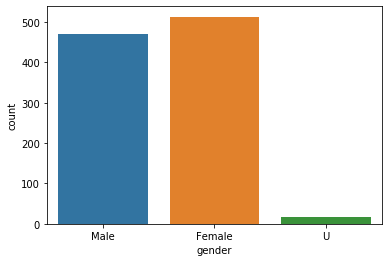

In [15]:
sns.countplot('gender',data = new_customers)
plt.show()

So moving on to the NewCustmoers table in the 'gender' column I found that it contains malicious value 'U'.

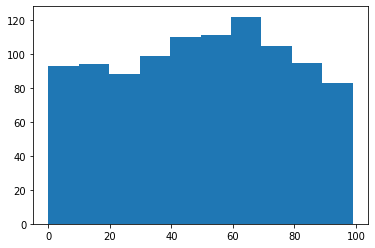

In [16]:
plt.hist(new_customers.past_3_years_bike_related_purchases)
plt.show()

Eldest Custmer :  1938-06-08 00:00:00
Youngest Custmer :  2002-02-27 00:00:00


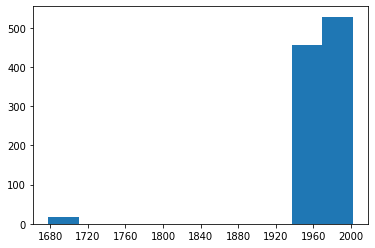

In [17]:
plt.hist(new_customers.DOB)
print("Eldest Custmer : ",new_customers.DOB.min())
print("Youngest Custmer : ",new_customers.DOB.max())

Concerning the 'DOB' column, I found one entery through plotting that there is one case that was born around the 17th century which seems pretty irrelevant. However, while trying to print this value on console, it didn't appear which is quite intresting.

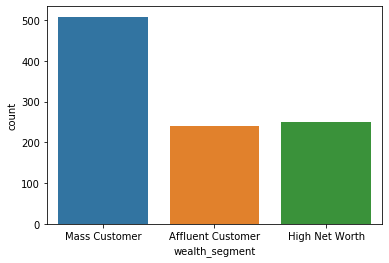

In [18]:
sns.countplot('wealth_segment',data = new_customers)
plt.show()

In [19]:
print("Percentage of alive customers : ",len(new_customers[new_customers.deceased_indicator == 'N'])/new_customers.shape[0]*100)

Percentage of alive customers :  100.0


In [20]:
print("Percentage of Australian customers : ",len(new_customers[new_customers.country == 'Australia'])/new_customers.shape[0]*100) 

Percentage of Australian customers :  100.0


So, since the 'deceased_indicator' & 'country columns carry the same value for every customer there is, I suggest keeping those columns in general but remove them on modeling to reduce redundancey.

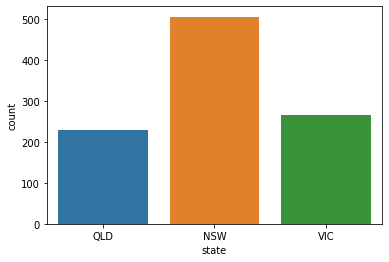

In [21]:
sns.countplot('state',data = new_customers)
plt.show()

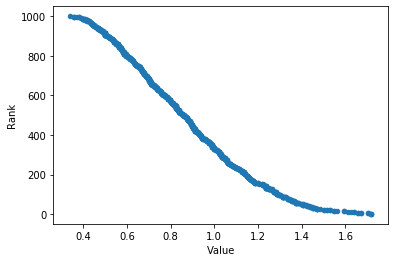

In [22]:
new_customers.plot.scatter('Value','Rank')
plt.show()

Here I viewed the relation between customer rank & customer value. It seems logical, when the value increases the rank goes higher thus, decreases in value.

In [23]:
print("Percentage of duplicated rows  : ",len(new_customers[new_customers.duplicated()])/new_customers.shape[0]*100,"%")

Percentage of duplicated rows  :  0.0 %


### C) CustomerDempgraphs

In [24]:
demographs.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


After the first look over the Customer Dempgraphics table, we can find that the column 'default' is quite ininterpretable.


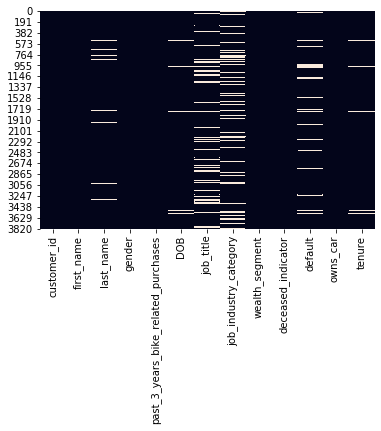

Percentage of missing job titles :  12.65 %
Percentage of missing job industry categories :  16.400000000000002 %
Percentage of missing job titles & job industry categories :  2.625 %


In [25]:
sns.heatmap(demographs.isnull(),cbar = False)
plt.show()
print("Percentage of missing job titles : ",len(demographs[demographs.job_title.isnull()])/demographs.shape[0]*100,"%" )
print("Percentage of missing job industry categories : ",len(demographs[demographs.job_industry_category.isnull()])/demographs.shape[0]*100,"%" )
print("Percentage of missing job titles & job industry categories : ",len(demographs[demographs.job_industry_category.isnull() & demographs.job_title.isnull() ])/demographs.shape[0]*100,"%" )

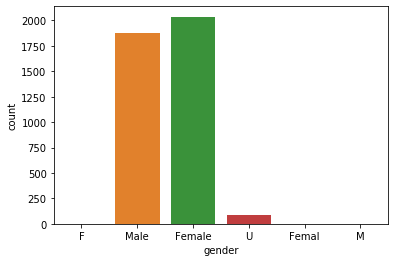

In [26]:
sns.countplot('gender',data = demographs)
plt.show()

Here we see the column gender is quite messy, there are type errors & unmatching convensions, there is also the same unknown value 'U'.

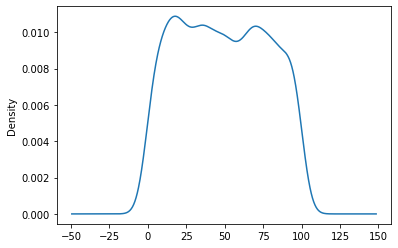

In [27]:
demographs.past_3_years_bike_related_purchases.plot.density()
plt.show()


Eldest Custmer :  1843-12-21 00:00:00
Youngest Custmer :  2002-03-11 00:00:00


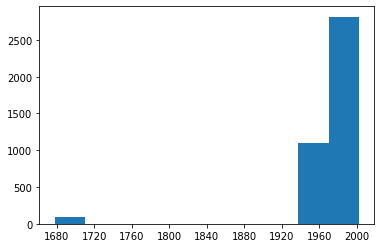

In [28]:
plt.hist(demographs.DOB)
print("Eldest Custmer : ",demographs.DOB.min())
print("Youngest Custmer : ",demographs.DOB.max())

Here in the 'DOB' we can find some irrelevant values as there is one customer who is recorded to be born on 1843 ! 

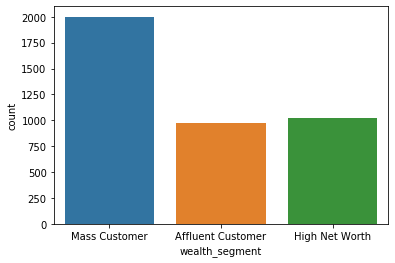

In [29]:
sns.countplot('wealth_segment',data = demographs)
plt.show()

In [30]:
print(demographs.job_industry_category.value_counts())

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64


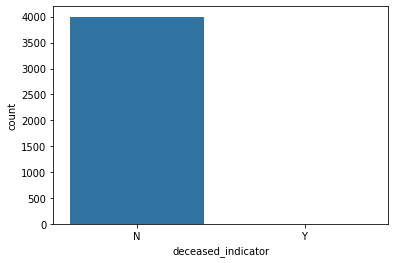

In [31]:
sns.countplot('deceased_indicator',data = demographs)
plt.show()

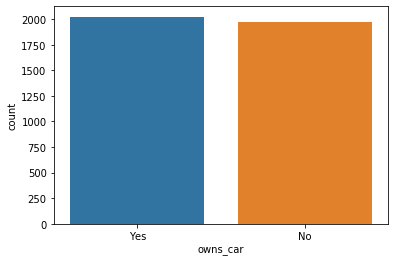

In [32]:
sns.countplot('owns_car',data = demographs)
plt.show()

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


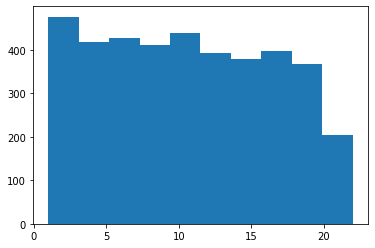

In [33]:
plt.hist(demographs.tenure)
plt.show()


In [43]:
print("Percentage of unique identifiers : ",len(demographs.customer_id.unique())/demographs.shape[0]*100,"%")

Percentage of unique identifiers :  100.0 %


In [34]:
print("Percentage of duplicated rows  : ",len(demographs[demographs.duplicated()])/demographs.shape[0]*100,"%")

Percentage of duplicated rows  :  0.0 %


### D) CustomerAddresses

In [35]:
addresses.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


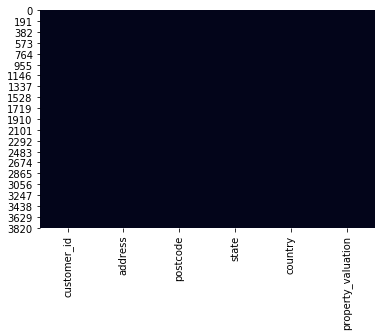

In [36]:
sns.heatmap(addresses.isnull(),cbar = False)
plt.show()

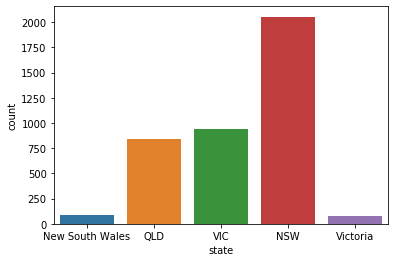

In [37]:
sns.countplot('state',data = addresses)
plt.show()

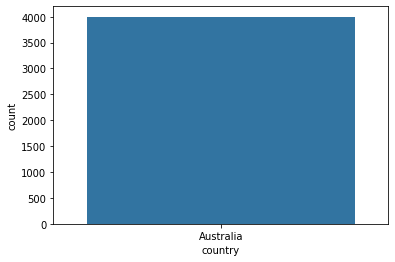

In [38]:
sns.countplot('country',data = addresses)
plt.show()

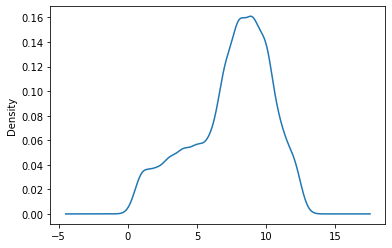

In [39]:
addresses.property_valuation.plot.density()
plt.show()


In [44]:
print("Percentage of unique identifiers : ",len(addresses.customer_id.unique())/addresses.shape[0]*100,"%")

Percentage of unique identifiers :  100.0 %


In [40]:
print("Percentage of duplicated rows  : ",len(addresses[addresses.duplicated()])/addresses.shape[0]*100,"%")

Percentage of duplicated rows  :  0.0 %
